<a href="https://colab.research.google.com/github/varinen/DivisionlabOneStepCheckout/blob/master/Week2_Ex2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 2: Excercise 2


In [6]:
import tensorflow as tf

# YOUR CODE SHOULD START HERE

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')>0.99):
      print("\nReached 99% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()
# YOUR CODE SHOULD END HERE

mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
# YOUR CODE SHOULD START HERE

# normalize
x_train = x_train / 255.0
x_test = x_test / 255.0

# YOUR CODE SHOULD END HERE
model = tf.keras.models.Sequential([
    # YOUR CODE SHOULD START HERE
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)    
# YOUR CODE SHOULD END HERE
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# YOUR CODE SHOULD START HERE
model.fit(x_train, y_train, epochs=10, callbacks=[callbacks])
# YOUR CODE SHOULD END HERE


Epoch 1/10
60000/60000 [==============================] - 13s 211us/sample - loss: 0.2022 - acc: 0.9403
Epoch 2/10
60000/60000 [==============================] - 12s 206us/sample - loss: 0.0804 - acc: 0.9756
Epoch 3/10
60000/60000 [==============================] - 12s 208us/sample - loss: 0.0514 - acc: 0.9842
Epoch 4/10
60000/60000 [==============================] - 13s 214us/sample - loss: 0.0367 - acc: 0.9881
Epoch 5/10
59936/60000 [============================>.] - ETA: 0s - loss: 0.0276 - acc: 0.9912
Reached 99% accuracy so cancelling training!
60000/60000 [==============================] - 12s 205us/sample - loss: 0.0276 - acc: 0.9912


In [10]:
model.evaluate(x_test, y_test)
classifications = model.predict(x_test)
print(classifications[0])
print(y_test[0])

10000/10000 [==============================] - 1s 60us/sample - loss: 0.0648 - acc: 0.9802
[9.35131764e-11 6.51477552e-11 4.38293917e-08 4.63993416e-07
 1.09105996e-16 6.67536165e-12 6.18432138e-15 9.99999523e-01
 6.22903534e-11 3.12002951e-10]
7


In [9]:
print(classifications[0].argmax())

7


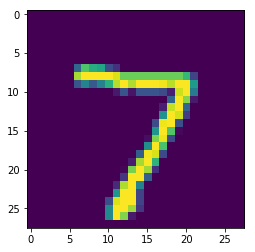

In [11]:
import matplotlib.pyplot as plt
plt.imshow(x_test[0])